# Part 1: Recursive Definition of P(C)

Let P(C) be the maximum profit that can be made by packing objects into the knapsack of capacity C.

The recursive definition of P(C) is:

$$P(C) = \max_{i=0}^{n-1}\{P(C - w_i) + p_i\} \text{ for all items } i \text{ where } w_i \leq C$$

Base case: $P(0) = 0$

In words:
1. For a knapsack with capacity $C$, we try taking each item $i$
1. After taking item $i$, the remaining capacity is $C - w_i$
1. The profit from taking item $i$ is $p_i$ plus the profit from the remaining capacity $P(C - w_i)$
1. We choose the item that maximizes the total profit
1. If no item can fit (or $C = 0$), the profit is $0$

**Time Complexity**: $O(\text{Capacity} * \text{Number of objects types})$ \
**Space Complexity**: $O(\text{Capacity})$

## Part 2: Subproblem Graph for P(14)

Draw the subproblem graph for P(14) where n = 3 with the weights and profits given below:

| i | 0 | 1 | 2 |
|---|---|---|---|
| wi| 4 | 6 | 8 |
| pi| 7 | 6 | 9 |

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from matplotlib.patches import FancyArrowPatch, Rectangle
import graphviz

%config InlineBackend.figure_format = 'retina'

In [2]:
def visualize_knapsack_subproblem_graph(
    weights, values, capacity, output_file="knapsack_graph", view=True
):
    """
    Visualize the subproblem graph for an unbounded knapsack problem using graphviz.
    Each item has unlimited supply.

    Args:
        weights: List of item weights
        values: List of item values
        capacity: Knapsack capacity
        output_file: Base name for the output file (without extension)
        view: Whether to open the rendered graph after creation

    Returns:
        The rendered graph file path
    """
    # Create a new directed graph
    dot = graphviz.Digraph(comment="Unbounded Knapsack Subproblem Graph")

    # Set graph attributes for better visualization
    dot.attr("graph", rankdir="LR")  # Left to right layout
    dot.attr("node", shape="box", style="filled", color="lightblue")

    # Track created nodes to avoid duplicate node creation
    created_nodes = set()

    # Track overlapping subproblems (visited more than once)
    visit_count = {}

    def knapsack(c, parent_id=None, edge_label=None):
        """
        Recursive function to solve unbounded knapsack problem and build the graph.

        Args:
            c: Current remaining capacity
            parent_id: ID of the parent node in the graph
            edge_label: Label for the edge from parent to this node

        Returns:
            Maximum value achievable
        """
        # Create node ID for current state
        node_id = f"P({c})"

        # Count visits to this state
        visit_count[node_id] = visit_count.get(node_id, 0) + 1

        # Add this node to the graph if not already created
        if node_id not in created_nodes:
            created_nodes.add(node_id)
            label = f"Capacity: {c}"
            dot.node(node_id, label)

        # Connect to parent node if applicable
        if parent_id and edge_label:
            dot.edge(parent_id, node_id, label=edge_label)

        # Base case
        if c == 0:
            return 0

        # Try taking each item (can be used multiple times)
        max_val = 0
        for i in range(len(weights)):
            if weights[i] <= c:
                # For each item that fits, create a recursive subproblem
                # The same item can be used again
                val = values[i] + knapsack(
                    c - weights[i],
                    node_id,
                    f"Take item {i} (w={weights[i]}, p={values[i]})",
                )
                max_val = max(max_val, val)

        return max_val

    # Start the recursive process with full capacity
    optimal_value = knapsack(capacity)

    # Highlight overlapping subproblems
    for node_id, count in visit_count.items():
        if count > 1:
            dot.node(
                node_id,
                _attributes={
                    "color": "lightcoral",
                    "tooltip": f"Visited {count} times",
                },
            )

    # Add title with problem details
    dot.attr(
        "graph",
        label=(
            f"Unbounded Knapsack Problem\n"
            f"Items: {len(weights)} types (unlimited supply)\n"
            f"Capacity: {capacity}\n"
            f"Max Value: {optimal_value}"
        ),
    )

    return dot

In [3]:
weights = [4, 6, 8]
values = [7, 6, 9]
capacity = 14

graph = visualize_knapsack_subproblem_graph(weights, values, capacity)

In [4]:
graph.view()

'Digraph.gv.pdf'

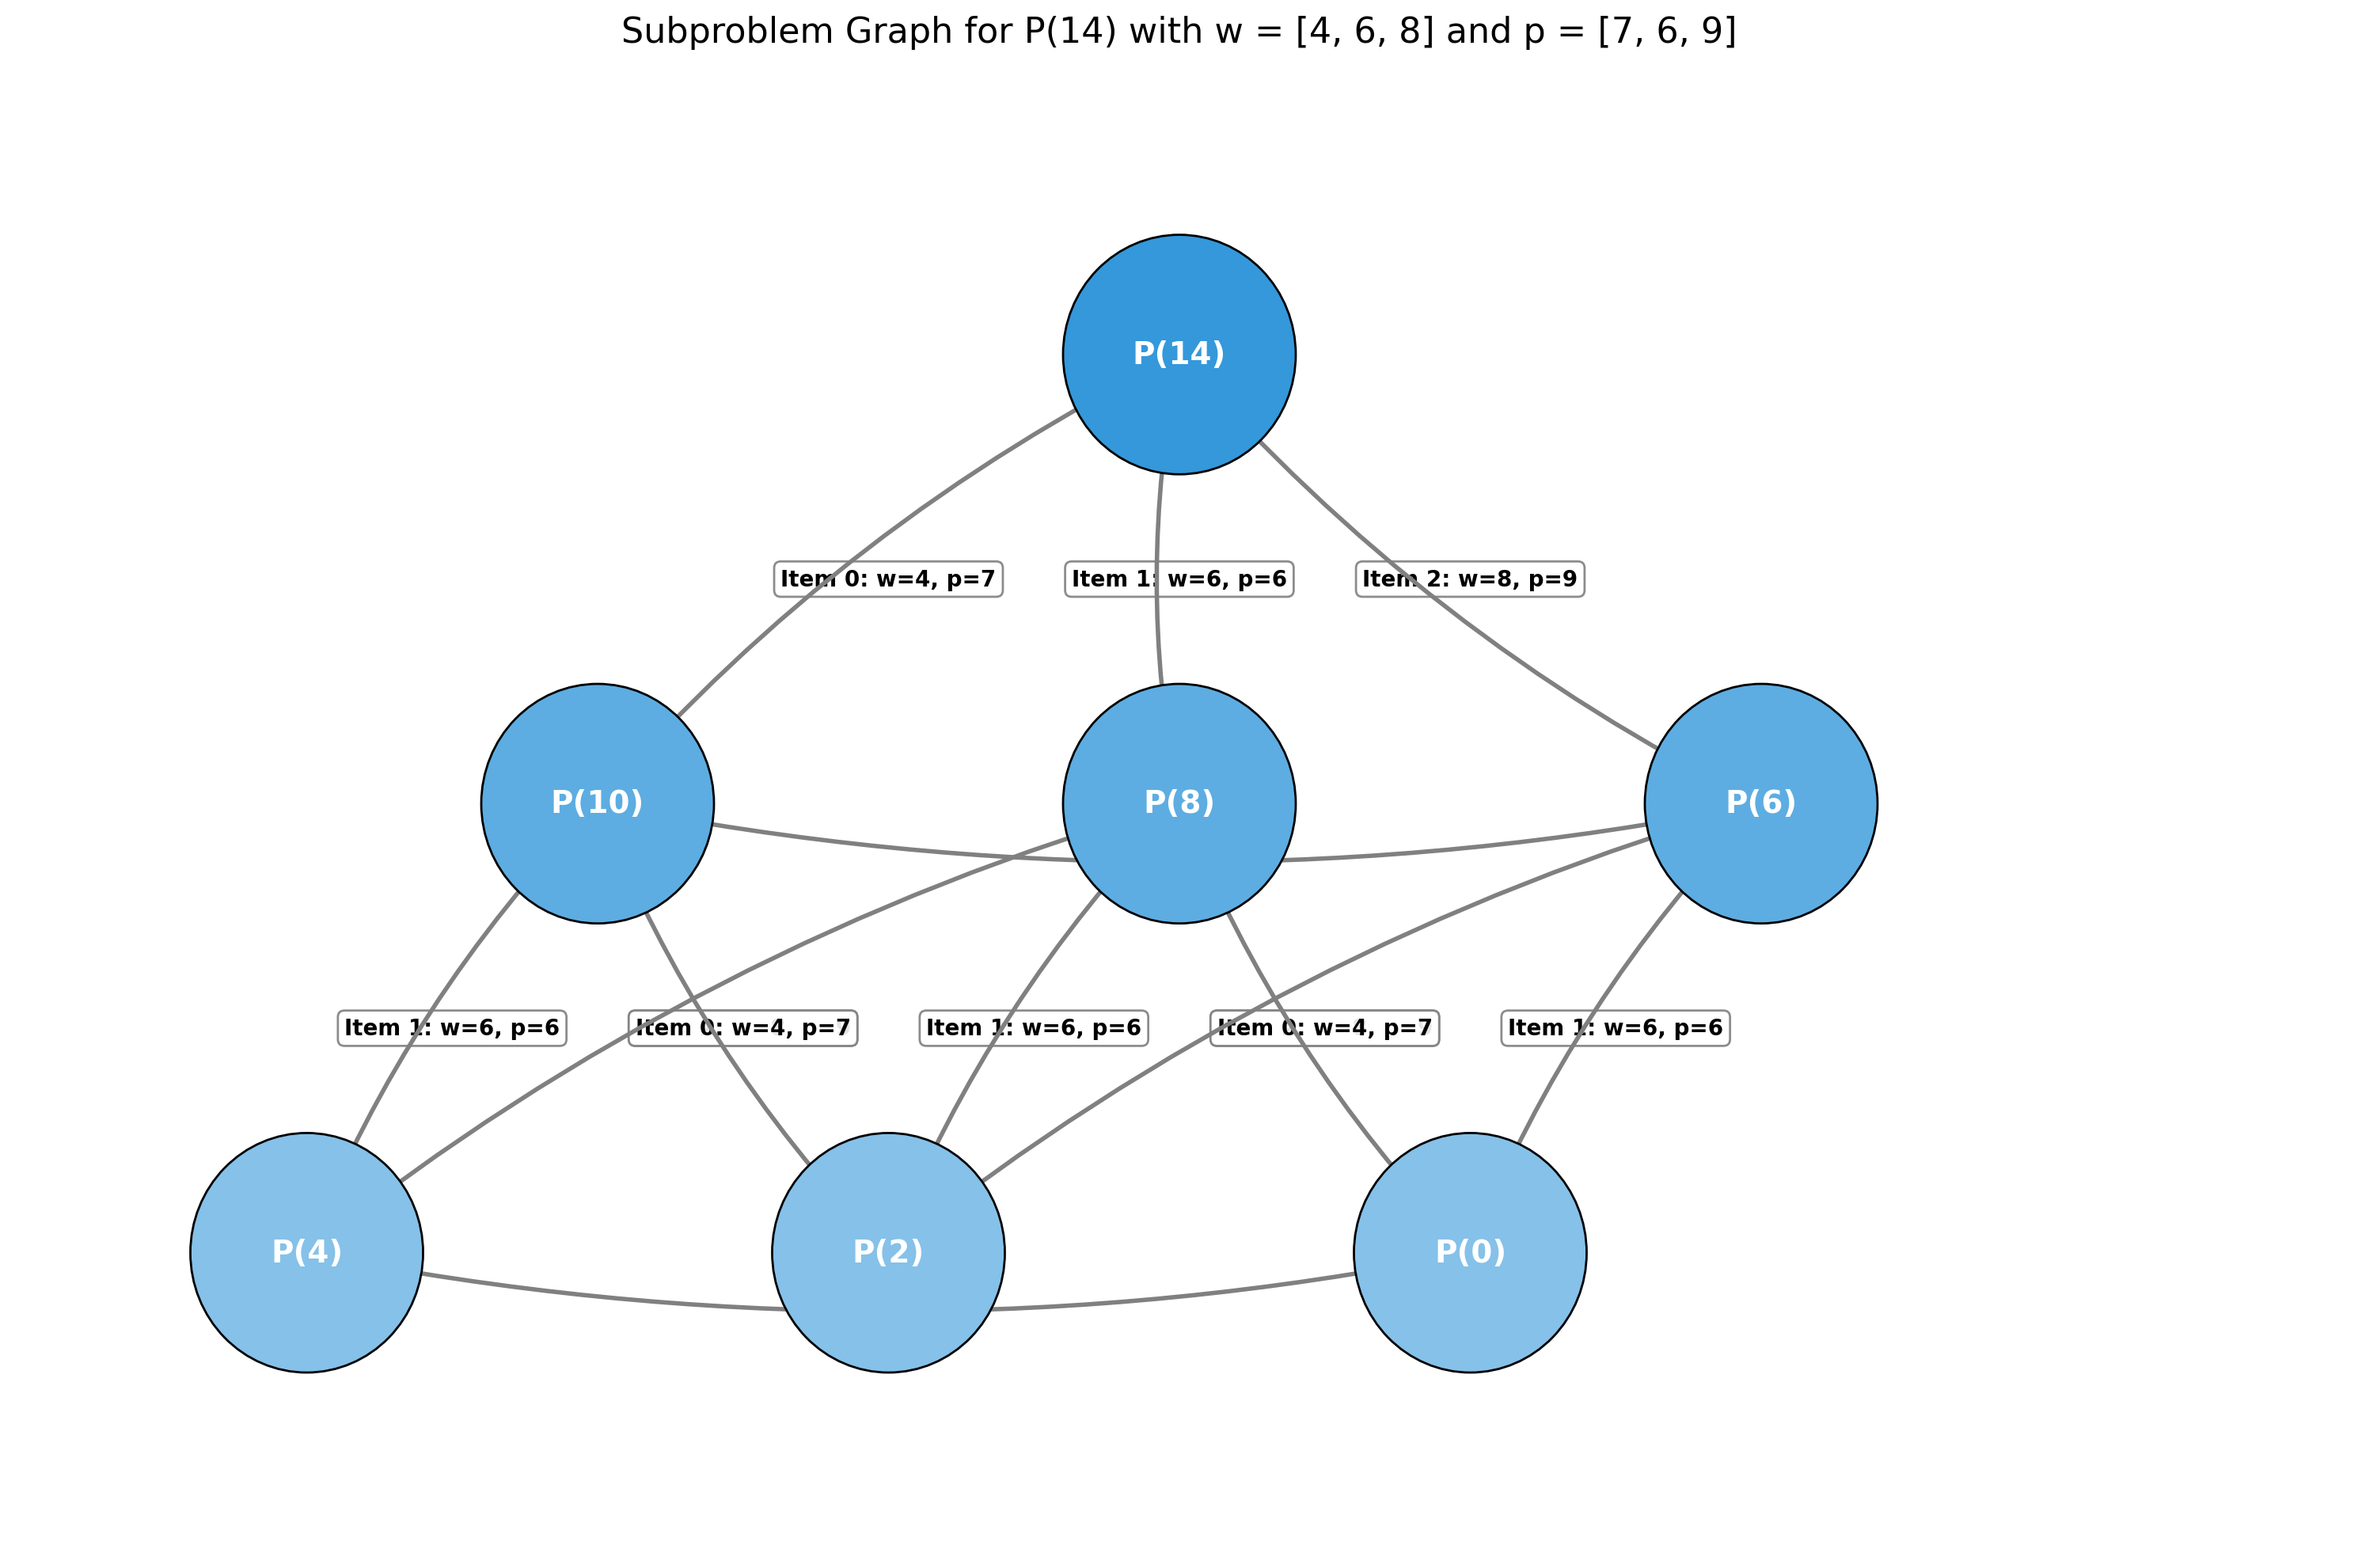

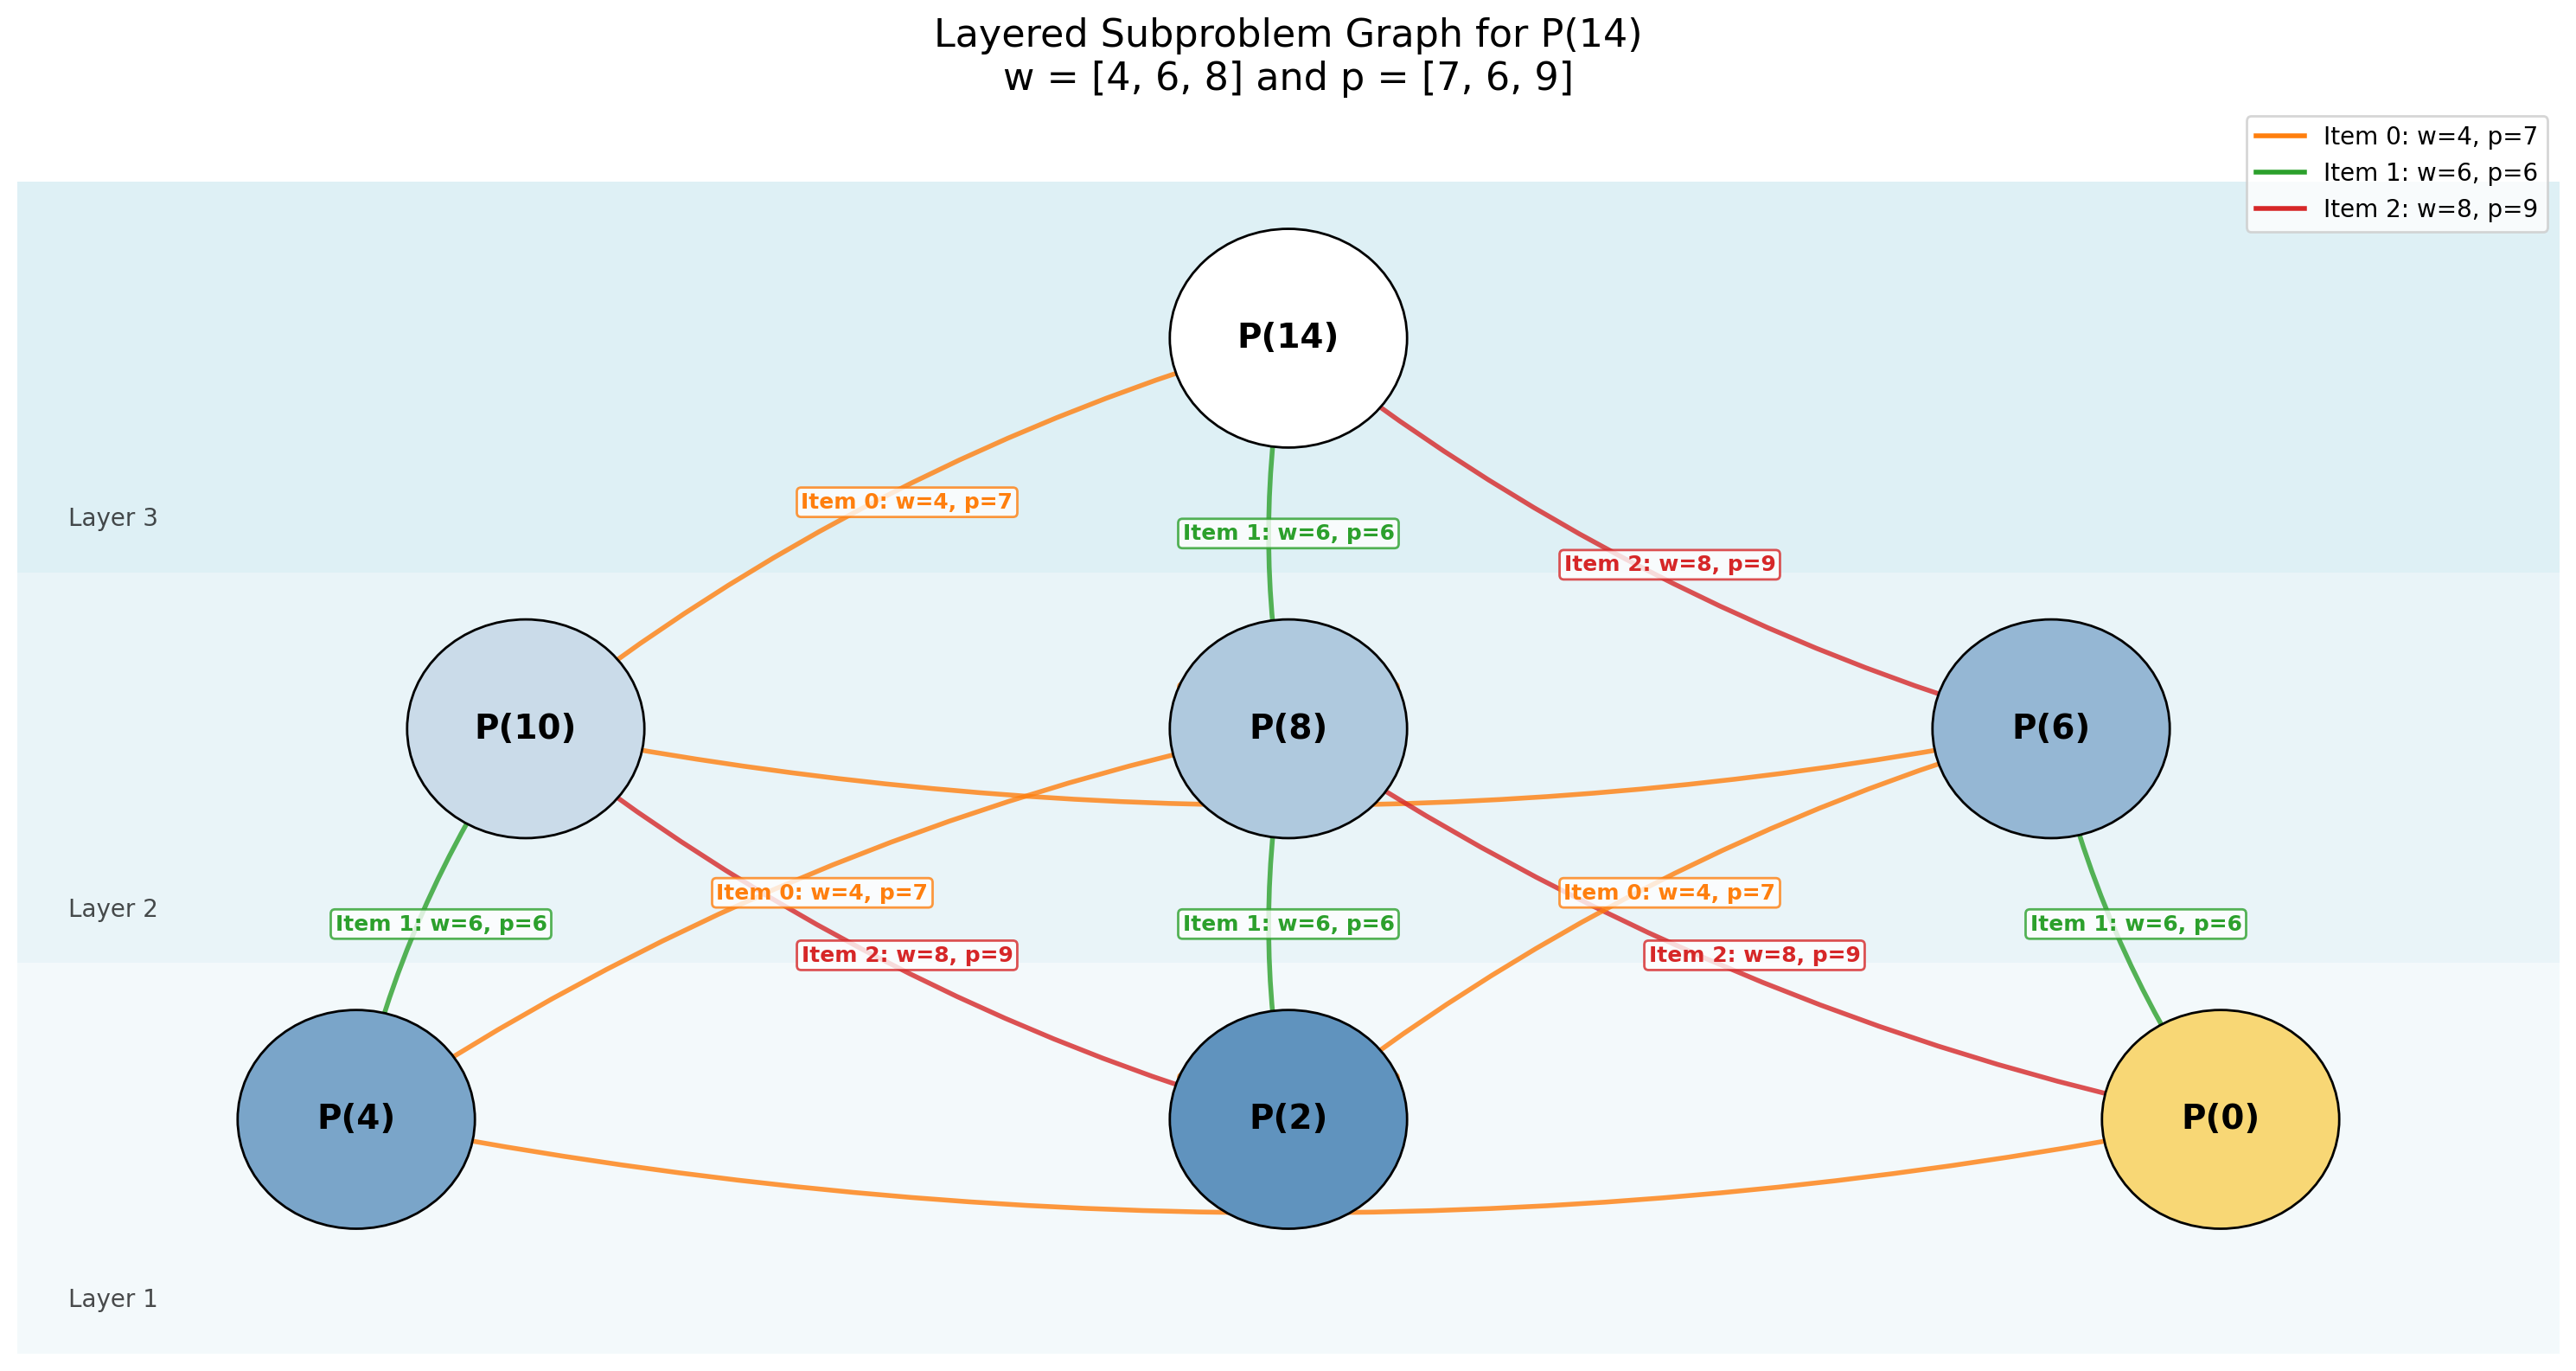

In [5]:
def create_tree_style_graph():
    """Create a tree-style visualization of the subproblem graph."""
    fig, ax = plt.subplots(figsize=(15, 10))

    # Define node positions in a tree structure
    positions = {
        "P(14)": (7, 9),
        "P(10)": (3, 6),
        "P(8)": (7, 6),
        "P(6)": (11, 6),
        "P(4)": (1, 3),
        "P(2)": (5, 3),
        "P(0)": (9, 3),
    }

    # Node colors - gradual color scheme to show depth
    node_colors = {
        "P(14)": "#3498db",  # Blue
        "P(10)": "#5dade2",
        "P(8)": "#5dade2",
        "P(6)": "#5dade2",  # Lighter blue
        "P(4)": "#85c1e9",
        "P(2)": "#85c1e9",
        "P(0)": "#85c1e9",  # Even lighter blue
    }

    # Define connections
    connections = [
        # From P(14)
        ("P(14)", "P(10)", "Item 0: w=4, p=7"),
        ("P(14)", "P(8)", "Item 1: w=6, p=6"),
        ("P(14)", "P(6)", "Item 2: w=8, p=9"),
        # From P(10)
        ("P(10)", "P(6)", "Item 0: w=4, p=7"),
        ("P(10)", "P(4)", "Item 1: w=6, p=6"),
        ("P(10)", "P(2)", "Item 2: w=8, p=9"),
        # From P(8)
        ("P(8)", "P(4)", "Item 0: w=4, p=7"),
        ("P(8)", "P(2)", "Item 1: w=6, p=6"),
        ("P(8)", "P(0)", "Item 2: w=8, p=9"),
        # From P(6)
        ("P(6)", "P(2)", "Item 0: w=4, p=7"),
        ("P(6)", "P(0)", "Item 1: w=6, p=6"),
        # From P(4)
        ("P(4)", "P(0)", "Item 0: w=4, p=7"),
    ]

    # Draw nodes
    for node, pos in positions.items():
        circle = plt.Circle(pos, 0.8, color=node_colors[node], ec="black", zorder=10)
        ax.add_patch(circle)
        plt.text(
            pos[0],
            pos[1],
            node,
            ha="center",
            va="center",
            fontsize=14,
            fontweight="bold",
            color="white",
            zorder=11,
        )

    # Draw connections with curved arrows for better visibility
    for start_node, end_node, label in connections:
        start_pos = positions[start_node]
        end_pos = positions[end_node]

        # Create a curved arrow
        connection_style = "arc3,rad=0.1"
        arrow = FancyArrowPatch(
            start_pos,
            end_pos,
            connectionstyle=connection_style,
            arrowstyle="->",
            color="gray",
            lw=2,
            zorder=5,
        )
        ax.add_patch(arrow)

        # Calculate position for the label (midpoint of the curve)
        # Add slight offset to avoid overlap
        mid_x = (start_pos[0] + end_pos[0]) / 2
        mid_y = (start_pos[1] + end_pos[1]) / 2

        # Add edge label with fancy styling
        plt.text(
            mid_x,
            mid_y,
            label,
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            bbox=dict(
                facecolor="white", edgecolor="gray", boxstyle="round,pad=0.3", alpha=0.9
            ),
        )

    plt.title(
        "Subproblem Graph for P(14) with w = [4, 6, 8] and p = [7, 6, 9]", fontsize=16
    )
    plt.xlim(-1, 15)
    plt.ylim(1, 11)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("tree_style_subproblem_graph.png", dpi=300, bbox_inches="tight")
    plt.show()


def create_layered_graph():
    """Create a layered visualization of the subproblem graph."""
    fig, ax = plt.subplots(figsize=(15, 8))

    # Background for different layers
    layer_colors = ["#e8f4f8", "#d4ebf2", "#bfe2ec"]
    for i, color in enumerate(layer_colors):
        layer = Rectangle(
            (0, i * 2.5), 15, 2.5, facecolor=color, edgecolor="none", alpha=0.5
        )
        ax.add_patch(layer)
        plt.text(0.3, i * 2.5 + 0.3, f"Layer {i+1}", fontsize=10, alpha=0.7)

    # Define node positions in clearly separated layers
    positions = {
        "P(14)": (7.5, 6.5),  # Layer 1
        "P(10)": (3, 4),
        "P(8)": (7.5, 4),
        "P(6)": (12, 4),  # Layer 2
        "P(4)": (2, 1.5),
        "P(2)": (7.5, 1.5),
        "P(0)": (13, 1.5),  # Layer 3
    }

    # Define connections with their corresponding items
    connections = [
        # From P(14)
        ("P(14)", "P(10)", "Item 0: w=4, p=7"),
        ("P(14)", "P(8)", "Item 1: w=6, p=6"),
        ("P(14)", "P(6)", "Item 2: w=8, p=9"),
        # From P(10)
        ("P(10)", "P(6)", "Item 0: w=4, p=7"),
        ("P(10)", "P(4)", "Item 1: w=6, p=6"),
        ("P(10)", "P(2)", "Item 2: w=8, p=9"),
        # From P(8)
        ("P(8)", "P(4)", "Item 0: w=4, p=7"),
        ("P(8)", "P(2)", "Item 1: w=6, p=6"),
        ("P(8)", "P(0)", "Item 2: w=8, p=9"),
        # From P(6)
        ("P(6)", "P(2)", "Item 0: w=4, p=7"),
        ("P(6)", "P(0)", "Item 1: w=6, p=6"),
        # From P(4)
        ("P(4)", "P(0)", "Item 0: w=4, p=7"),
    ]

    # Assign colors to items
    item_colors = {
        "Item 0: w=4, p=7": "#ff7f0e",  # Orange
        "Item 1: w=6, p=6": "#2ca02c",  # Green
        "Item 2: w=8, p=9": "#d62728",  # Red
    }

    # Draw connections with color-coded arrows by item type
    for start_node, end_node, label in connections:
        start_pos = positions[start_node]
        end_pos = positions[end_node]
        color = item_colors[label]

        # Draw arrow
        arrow = FancyArrowPatch(
            start_pos,
            end_pos,
            connectionstyle="arc3,rad=0.1",
            arrowstyle="->",
            color=color,
            lw=2,
            alpha=0.8,
        )
        ax.add_patch(arrow)

        # Calculate midpoint for label
        mid_x = (start_pos[0] + end_pos[0]) / 2
        mid_y = (start_pos[1] + end_pos[1]) / 2

        # Add a small offset
        if label.startswith("Item 0"):
            offset_y = 0.2
        elif label.startswith("Item 1"):
            offset_y = 0
        else:
            offset_y = -0.2

        # Add edge label with matching color
        plt.text(
            mid_x,
            mid_y + offset_y,
            label,
            ha="center",
            va="center",
            fontsize=9,
            color=color,
            fontweight="bold",
            bbox=dict(
                facecolor="white", edgecolor=color, alpha=0.8, boxstyle="round,pad=0.2"
            ),
        )

    # Draw nodes
    for node, pos in positions.items():
        capacity = int(node.strip("P()"))
        if capacity == 0:
            node_color = "#f8d775"  # Gold for base case
        else:
            # Gradient based on capacity
            intensity = min(1.0, capacity / 14)
            node_color = f"#{int(70 + 185*intensity):02x}{int(130 + 125*intensity):02x}{int(180 + 75*intensity):02x}"

        circle = plt.Circle(pos, 0.7, color=node_color, ec="black", zorder=10)
        ax.add_patch(circle)
        plt.text(
            pos[0],
            pos[1],
            node,
            ha="center",
            va="center",
            fontsize=14,
            fontweight="bold",
            color="black",
            zorder=11,
        )

    # Add a legend for item types
    handles = []
    for item, color in item_colors.items():
        handles.append(plt.Line2D([0], [0], color=color, lw=2, label=item))
    plt.legend(handles=handles, loc="upper right", fontsize=10)

    plt.title(
        "Layered Subproblem Graph for P(14)\nw = [4, 6, 8] and p = [7, 6, 9]",
        fontsize=16,
    )
    plt.xlim(0, 15)
    plt.ylim(0, 8)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("layered_subproblem_graph.png", dpi=300, bbox_inches="tight")
    plt.show()


# Option 1: Tree-style graph with curved arrows
create_tree_style_graph()

# Option 2: Layered graph with color-coded arrows by item type
create_layered_graph()

### Explanation of the Subproblem Graph

The subproblem graph shows how the problem P(14) depends on smaller subproblems. Each node represents a subproblem P(c) where c is the capacity of the knapsack. An edge from P(c) to P(c-w_i) represents taking an item i with weight w_i and profit p_i.

For example, from P(14), we can:
- Take item 0 (w=4, p=7) and reduce to P(10)
- Take item 1 (w=6, p=6) and reduce to P(8)
- Take item 2 (w=8, p=9) and reduce to P(6)

Each of these smaller subproblems further depends on even smaller subproblems, forming a directed acyclic graph. The optimal solution is found by considering all possible paths and selecting the one with the highest total profit.

## Part 3: Dynamic Programming Algorithm (Bottom-Up Approach)


In [6]:
def unbounded_knapsack(C, w, p):
    """
    Dynamic Programming algorithm to compute the maximum profit for a knapsack of capacity C
    using the bottom-up approach.

    Args:
        C (int): Capacity of the knapsack.
        w (list): List of weights of the items.
        p (list): List of profits of the items.

    Returns:
        tuple: (maximum profit, list of chosen items, dp array)
    """
    n = len(w)  # Number of types of objects

    # Initialize array to store maximum profit for each capacity
    dp = [0] * (C + 1)

    # Initialize array to track which item was chosen for each capacity
    item_chosen = [None] * (C + 1)

    # Compute dp[c] for all capacities c from 1 to C (bottom-up)
    for c in range(1, C + 1):
        max_profit = 0
        chosen_item = None

        # Try each item
        for i in range(n):
            if w[i] <= c:
                current_profit = dp[c - w[i]] + p[i]
                if current_profit > max_profit:
                    max_profit = current_profit
                    chosen_item = i

        dp[c] = max_profit
        item_chosen[c] = chosen_item

    # Backtrack to find the solution (which items were chosen)
    solution = []
    remaining_capacity = C

    while remaining_capacity > 0 and item_chosen[remaining_capacity] is not None:
        item = item_chosen[remaining_capacity]
        solution.append(item)
        remaining_capacity -= w[item]

    return dp[C], solution, dp


def print_solution(max_profit, solution, w, p):
    """Print the solution in a readable format."""
    print(f"Maximum profit: {max_profit}")

    if not solution:
        print("No items were chosen.")
        return

    # Count occurrences of each item
    item_counts = {}
    for item in solution:
        item_counts[item] = item_counts.get(item, 0) + 1

    print("Items chosen:")
    total_weight = 0
    for item, count in item_counts.items():
        total_weight += w[item] * count
        print(f"  Item {item}: {count} units (weight={w[item]}, profit={p[item]})")

    print(f"Total weight: {total_weight}")


def visualize_dp_table(dp, C, title):
    """Visualize the dynamic programming table."""
    plt.figure(figsize=(12, 6))
    plt.bar(range(C + 1), dp, color="skyblue")
    plt.xlabel("Capacity")
    plt.ylabel("Maximum Profit")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(range(0, C + 1, 1))

    # Add value labels on top of each bar
    for i, v in enumerate(dp):
        plt.text(i, v + 0.5, str(v), ha="center")

    plt.tight_layout()
    plt.show()

### Explanation of the Algorithm

1. We create an array `dp` where `dp[c]` represents the maximum profit for a knapsack of capacity c.
2. We initialize `dp[0] = 0` (base case: no capacity means no profit).
3. For each capacity from 1 to C, we try taking each item and compute the profit.
4. For each item i, if it can fit (w_i ≤ c), we consider taking it and compute the profit as `dp[c - w_i] + p_i`.
5. We update `dp[c]` with the maximum profit found.
6. We also track which item was chosen for each capacity to reconstruct the solution.
7. After filling the dp table, we return the maximum profit `dp[C]` along with the solution.

The time complexity is O(C * n) where C is the capacity and n is the number of types of objects.
The space complexity is O(C) for the dp array.

## Part 4: Code Implementation and Testing

In [7]:
def spacious_dp_table_visualization(C, w, p):
    """
    Create a spacious, easy-to-read visualization of the DP table.

    Args:
        C (int): Capacity of the knapsack
        w (list): List of weights
        p (list): List of profits
    """
    n = len(w)

    # Initialize the DP table and item chosen tracking
    dp = [0] * (C + 1)
    item_chosen = [None] * (C + 1)

    # Build the full solution to track how we got each value
    decisions = [[] for _ in range(C + 1)]

    # Fill the DP table
    for c in range(1, C + 1):
        max_profit = 0
        chosen_item = None

        # Try each item and track all decisions considered
        for i in range(n):
            if w[i] <= c:
                current_profit = dp[c - w[i]] + p[i]

                # Store this decision for visualization
                decisions[c].append(
                    {
                        "item": i,
                        "weight": w[i],
                        "profit": p[i],
                        "remaining_capacity": c - w[i],
                        "remaining_profit": dp[c - w[i]],
                        "total_profit": current_profit,
                        "is_best": False,  # Will update this later
                    }
                )

                if current_profit > max_profit:
                    max_profit = current_profit
                    chosen_item = i

        dp[c] = max_profit
        item_chosen[c] = chosen_item

        # Mark the best decision
        if chosen_item is not None:
            for decision in decisions[c]:
                if decision["item"] == chosen_item:
                    decision["is_best"] = True

    # Backtrack to find the solution
    solution = []
    remaining_capacity = C

    while remaining_capacity > 0 and item_chosen[remaining_capacity] is not None:
        item = item_chosen[remaining_capacity]
        solution.append(item)
        remaining_capacity -= w[item]

    # Count items used in solution
    item_counts = {}
    for item in solution:
        item_counts[item] = item_counts.get(item, 0) + 1

    # Display problem information
    print("\n" + "=" * 80)
    print(f"DP TABLE FOR KNAPSACK WITH CAPACITY {C}")
    print(f"Weights: {w}")
    print(f"Profits: {p}")
    print("=" * 80 + "\n")

    # Create a DataFrame for the DP table
    data = []
    for c in range(C + 1):
        row = {
            "Capacity": c,
            "Max Profit": dp[c],
            "Item Chosen": item_chosen[c] if item_chosen[c] is not None else "None",
        }
        data.append(row)

    df = pd.DataFrame(data)
    display(df)

    # Create more spacious visualizations with separate figures

    # Figure 1: DP Table Values
    plt.figure(figsize=(14, 6))
    plt.bar(range(C + 1), dp, color="cornflowerblue")
    plt.title("Maximum Profit for Each Capacity", fontsize=16)
    plt.xlabel("Capacity", fontsize=14)
    plt.ylabel("Profit", fontsize=14)
    plt.xticks(range(C + 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", alpha=0.3)

    # Add value labels on top of each bar
    for i, v in enumerate(dp):
        plt.text(i, v + 0.5, str(v), ha="center", fontsize=11, fontweight="bold")

    plt.tight_layout()
    plt.show()

    # Figure 2: Items Chosen
    plt.figure(figsize=(14, 5))
    colors = [
        "#3498db",
        "#2ecc71",
        "#e74c3c",
        "#f39c12",
        "#9b59b6",
    ]  # Different colors for different items

    # Create bars for item chosen
    item_bars = [[] for _ in range(n)]
    for c in range(1, C + 1):
        if item_chosen[c] is not None:
            item_idx = item_chosen[c]
            item_bars[item_idx].append(c)

    for i in range(n):
        if item_bars[i]:
            plt.bar(
                item_bars[i],
                [1] * len(item_bars[i]),
                color=colors[i % len(colors)],
                label=f"Item {i}",
            )

    plt.title("Item Chosen for Each Capacity", fontsize=16)
    plt.xlabel("Capacity", fontsize=14)
    plt.xticks(range(C + 1), fontsize=12)
    plt.yticks([])
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Figure 3: Step-by-Step Table (Much more spacious)
    fig, ax = plt.subplots(figsize=(16, 10))

    # Prepare data for the table
    table_data = []
    for c in range(C + 1):
        if c == 0:
            row = ["P(0) = 0", "Base case"]
        elif item_chosen[c] is None:
            row = [f"P({c}) = 0", "No items fit"]
        else:
            chosen_item = item_chosen[c]
            prev_capacity = c - w[chosen_item]
            row = [
                f"P({c}) = {dp[c]}",
                f"Take item {chosen_item} (w={w[chosen_item]}, p={p[chosen_item]}) + P({prev_capacity})={dp[prev_capacity]}",
            ]
        table_data.append(row)

    # Create a much more spacious table
    table = ax.table(
        cellText=table_data,
        colLabels=["State", "Decision"],
        loc="center",
        cellLoc="center",
        colWidths=[0.15, 0.75],
    )

    # Style the table for better readability
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)  # Make rows taller

    # Style header
    for (row, col), cell in table.get_celld().items():
        if row == 0:  # Header row
            cell.set_text_props(fontproperties=dict(weight="bold", size=14))
            cell.set_facecolor("#4472C4")
            cell.set_text_props(color="white")
        else:
            # Alternate row colors for better readability
            if row % 2 == 0:
                cell.set_facecolor("#D9E1F2")
            else:
                cell.set_facecolor("#E9EDF4")

            # Highlight important cells
            if col == 0 and c == C and row - 1 == c:
                cell.set_facecolor("#FFC000")  # Highlight final solution
                cell.set_text_props(fontproperties=dict(weight="bold"))

    plt.title("Step-by-Step Solution Building", fontsize=18)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Display the optimal solution
    print("\n" + "=" * 80)
    print("OPTIMAL SOLUTION")
    print("=" * 80)
    print(f"Maximum Profit: {dp[C]}")

    if solution:
        print("\nItems chosen:")
        for item, count in item_counts.items():
            total_weight = w[item] * count
            total_profit = p[item] * count
            print(
                f"  Item {item}: {count} units (weight={w[item]}, profit={p[item]}, "
                f"total weight={total_weight}, total profit={total_profit})"
            )

        # Calculate total weight used
        total_weight_used = sum(w[item] * count for item, count in item_counts.items())
        print(f"\nTotal Weight Used: {total_weight_used} out of {C}")
        print(f"Total Profit: {dp[C]}")
    else:
        print("No items were chosen.")

    # Print the final sequence of decisions
    print("\nSequence of decisions to reach the optimal solution:")
    capacity = C
    step = 1

    while capacity > 0 and item_chosen[capacity] is not None:
        item = item_chosen[capacity]
        new_capacity = capacity - w[item]
        print(
            f"  Step {step}: At capacity {capacity}, take item {item} (w={w[item]}, p={p[item]}), "
            f"get profit {p[item]}, remaining capacity = {new_capacity}"
        )
        capacity = new_capacity
        step += 1

    # Display the detailed decision process in a more readable format
    print("\n" + "=" * 80)
    print("DETAILED DECISION PROCESS")
    print("=" * 80)
    print(
        "For each capacity, we compare taking different items and choose the best option.\n"
    )

    for c in range(1, C + 1):
        print(f"Capacity {c}:")
        print("-" * 60)

        if not decisions[c]:
            print("  No valid items can fit.\n")
            continue

        for decision in decisions[c]:
            chosen_marker = "★ BEST CHOICE ★" if decision["is_best"] else ""
            print(
                f"  Take item {decision['item']} (w={decision['weight']}, p={decision['profit']}):"
            )
            print(f"    Remaining capacity: {decision['remaining_capacity']}")
            print(
                f"    Profit from remaining capacity P({decision['remaining_capacity']}): {decision['remaining_profit']}"
            )
            print(f"    New item profit: {decision['profit']}")
            print(
                f"    Total profit: {decision['remaining_profit']} + {decision['profit']} = {decision['total_profit']} {chosen_marker}"
            )
            print()

        print(
            f"  → For capacity {c}, maximum profit is {dp[c]} by taking item {item_chosen[c]}.\n"
        )

### Test Case 1


DP TABLE FOR KNAPSACK WITH CAPACITY 14
Weights: [4, 6, 8]
Profits: [7, 6, 9]



,Capacity,Max Profit,Item Chosen
0,0,0,None
1,1,0,None
2,2,0,None
3,3,0,None
4,4,7,0
5,5,7,0
6,6,7,0
7,7,7,0
8,8,14,0
9,9,14,0


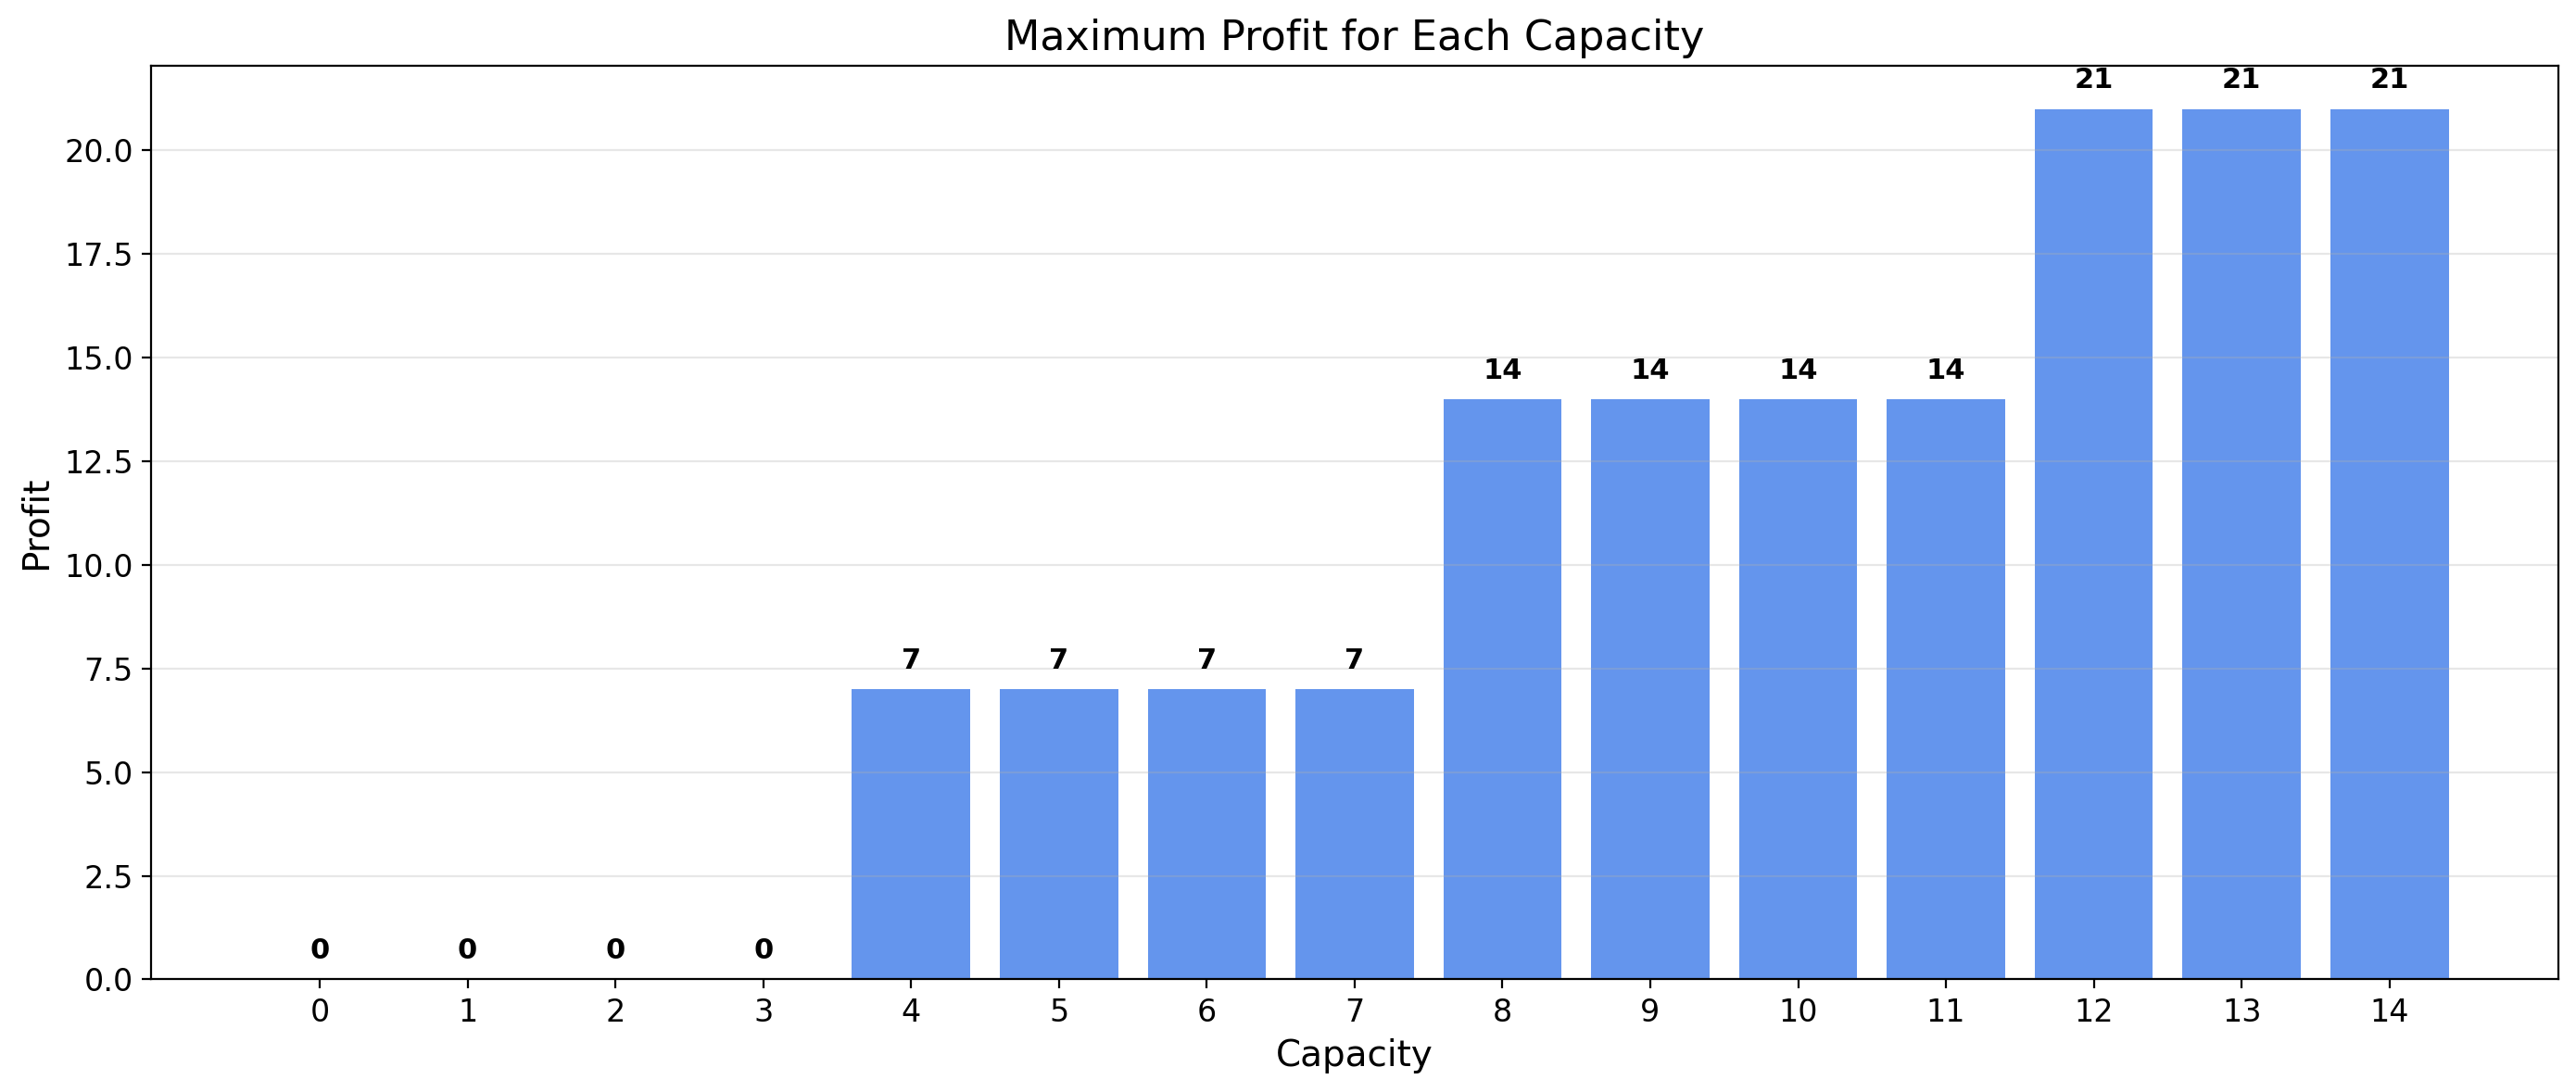

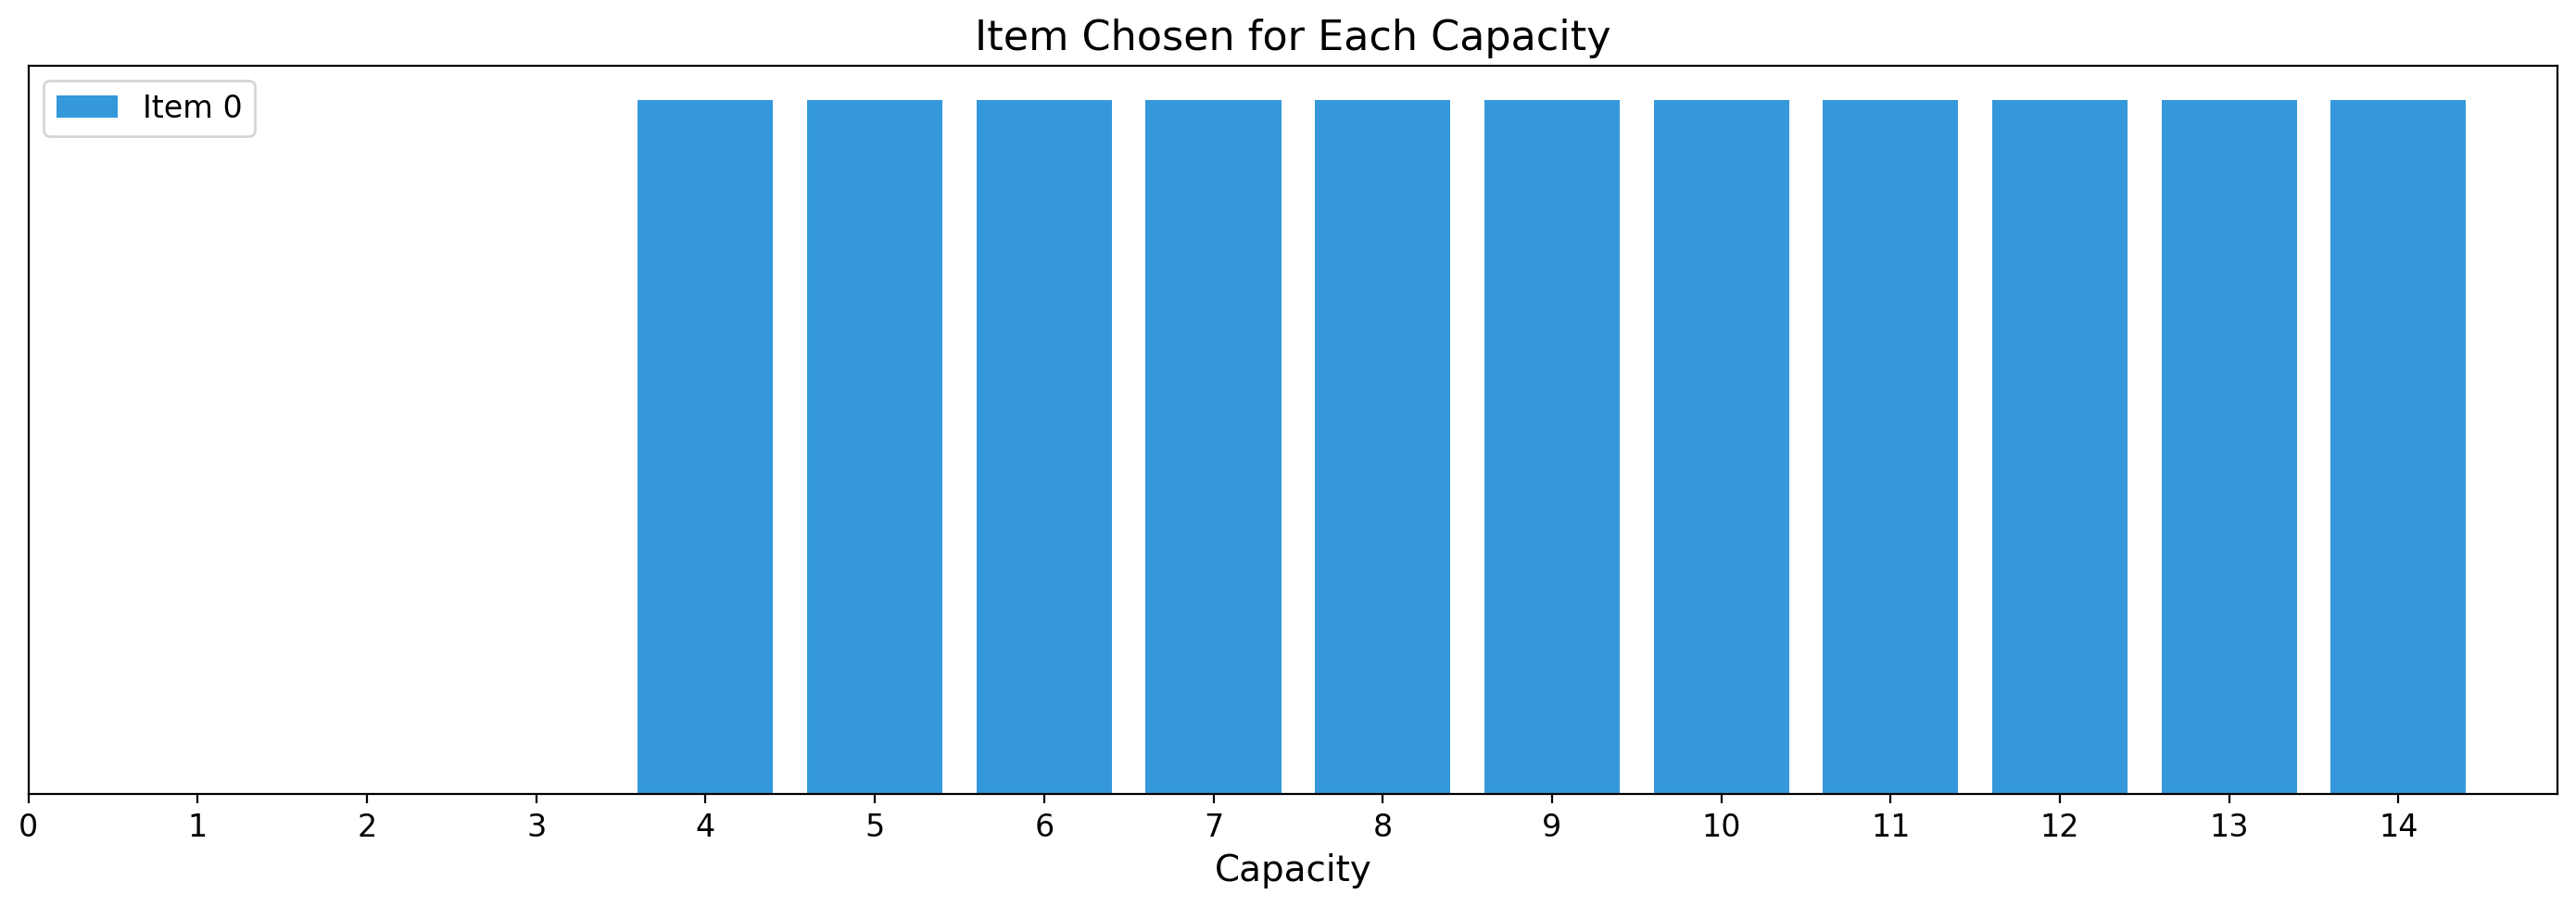

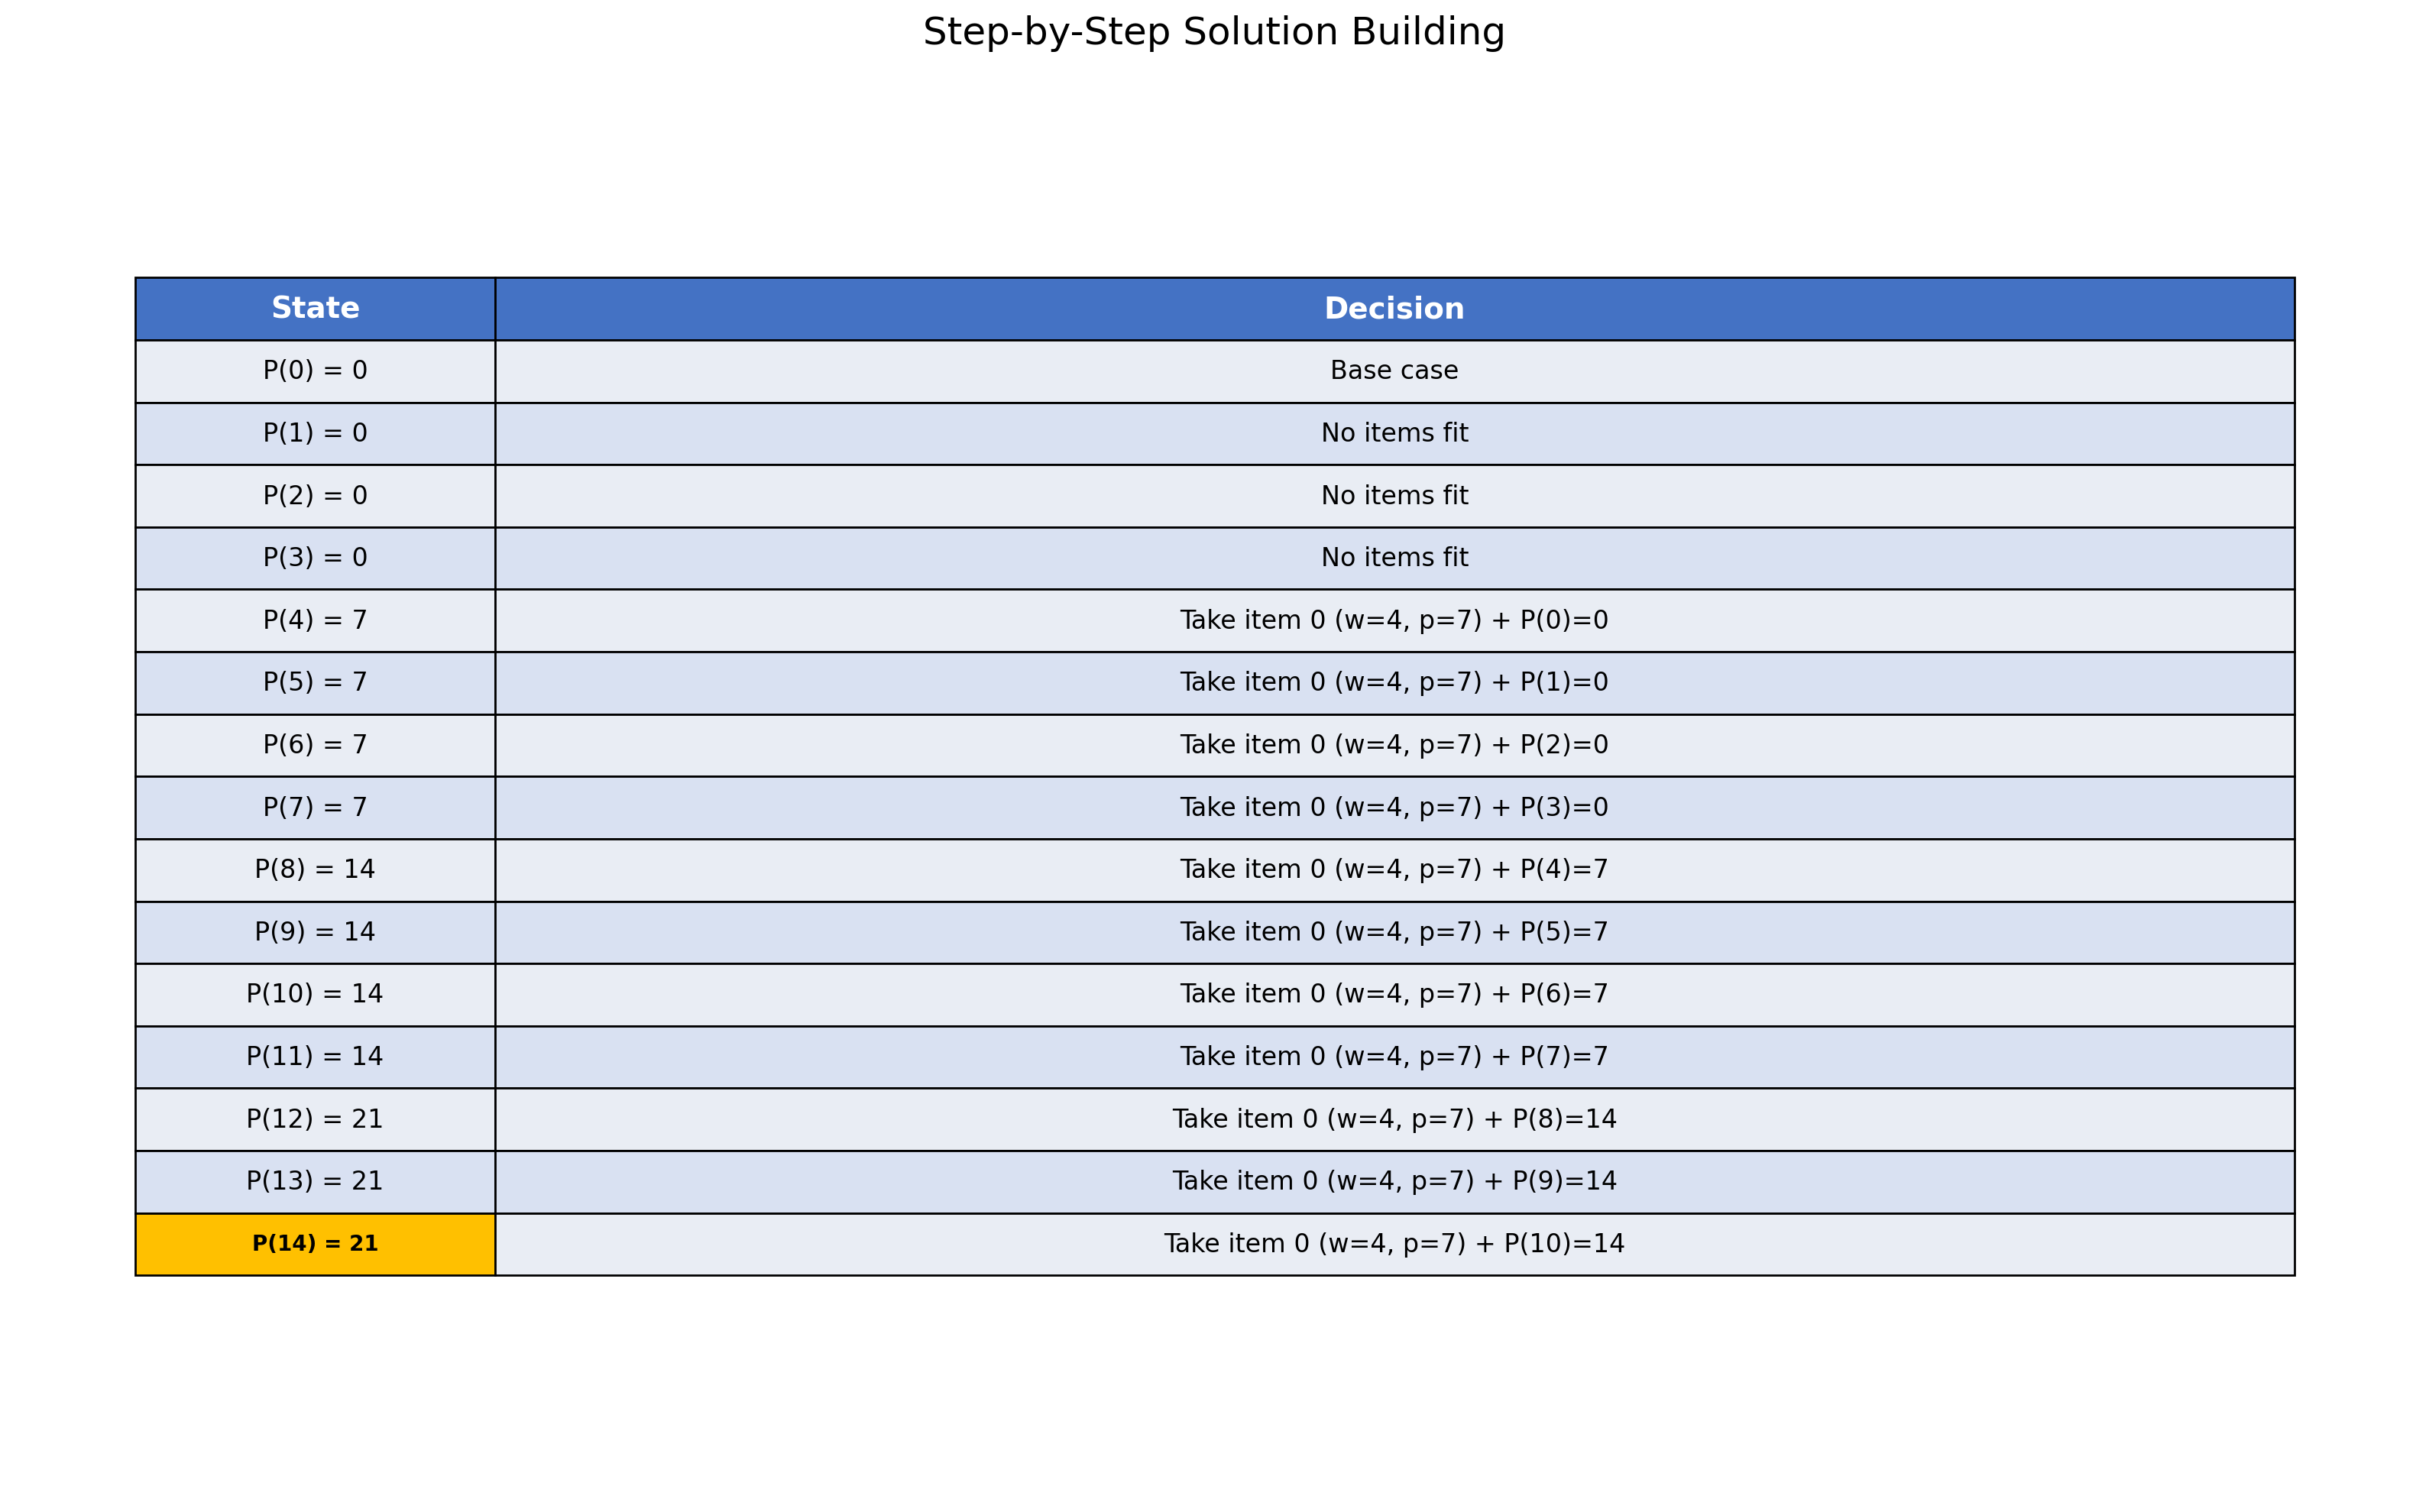


OPTIMAL SOLUTION
Maximum Profit: 21

Items chosen:
  Item 0: 3 units (weight=4, profit=7, total weight=12, total profit=21)

Total Weight Used: 12 out of 14
Total Profit: 21

Sequence of decisions to reach the optimal solution:
  Step 1: At capacity 14, take item 0 (w=4, p=7), get profit 7, remaining capacity = 10
  Step 2: At capacity 10, take item 0 (w=4, p=7), get profit 7, remaining capacity = 6
  Step 3: At capacity 6, take item 0 (w=4, p=7), get profit 7, remaining capacity = 2

DETAILED DECISION PROCESS
For each capacity, we compare taking different items and choose the best option.

Capacity 1:
------------------------------------------------------------
  No valid items can fit.

Capacity 2:
------------------------------------------------------------
  No valid items can fit.

Capacity 3:
------------------------------------------------------------
  No valid items can fit.

Capacity 4:
------------------------------------------------------------
  Take item 0 (w=4, p=7):
  

In [8]:
# Test case 1
C1 = 14
w1 = [4, 6, 8]
p1 = [7, 6, 9]
spacious_dp_table_visualization(C1, w1, p1)

### Test Case 2


DP TABLE FOR KNAPSACK WITH CAPACITY 14
Weights: [5, 6, 8]
Profits: [7, 6, 9]



,Capacity,Max Profit,Item Chosen
0,0,0,None
1,1,0,None
2,2,0,None
3,3,0,None
4,4,0,None
5,5,7,0
6,6,7,0
7,7,7,0
8,8,9,2
9,9,9,2


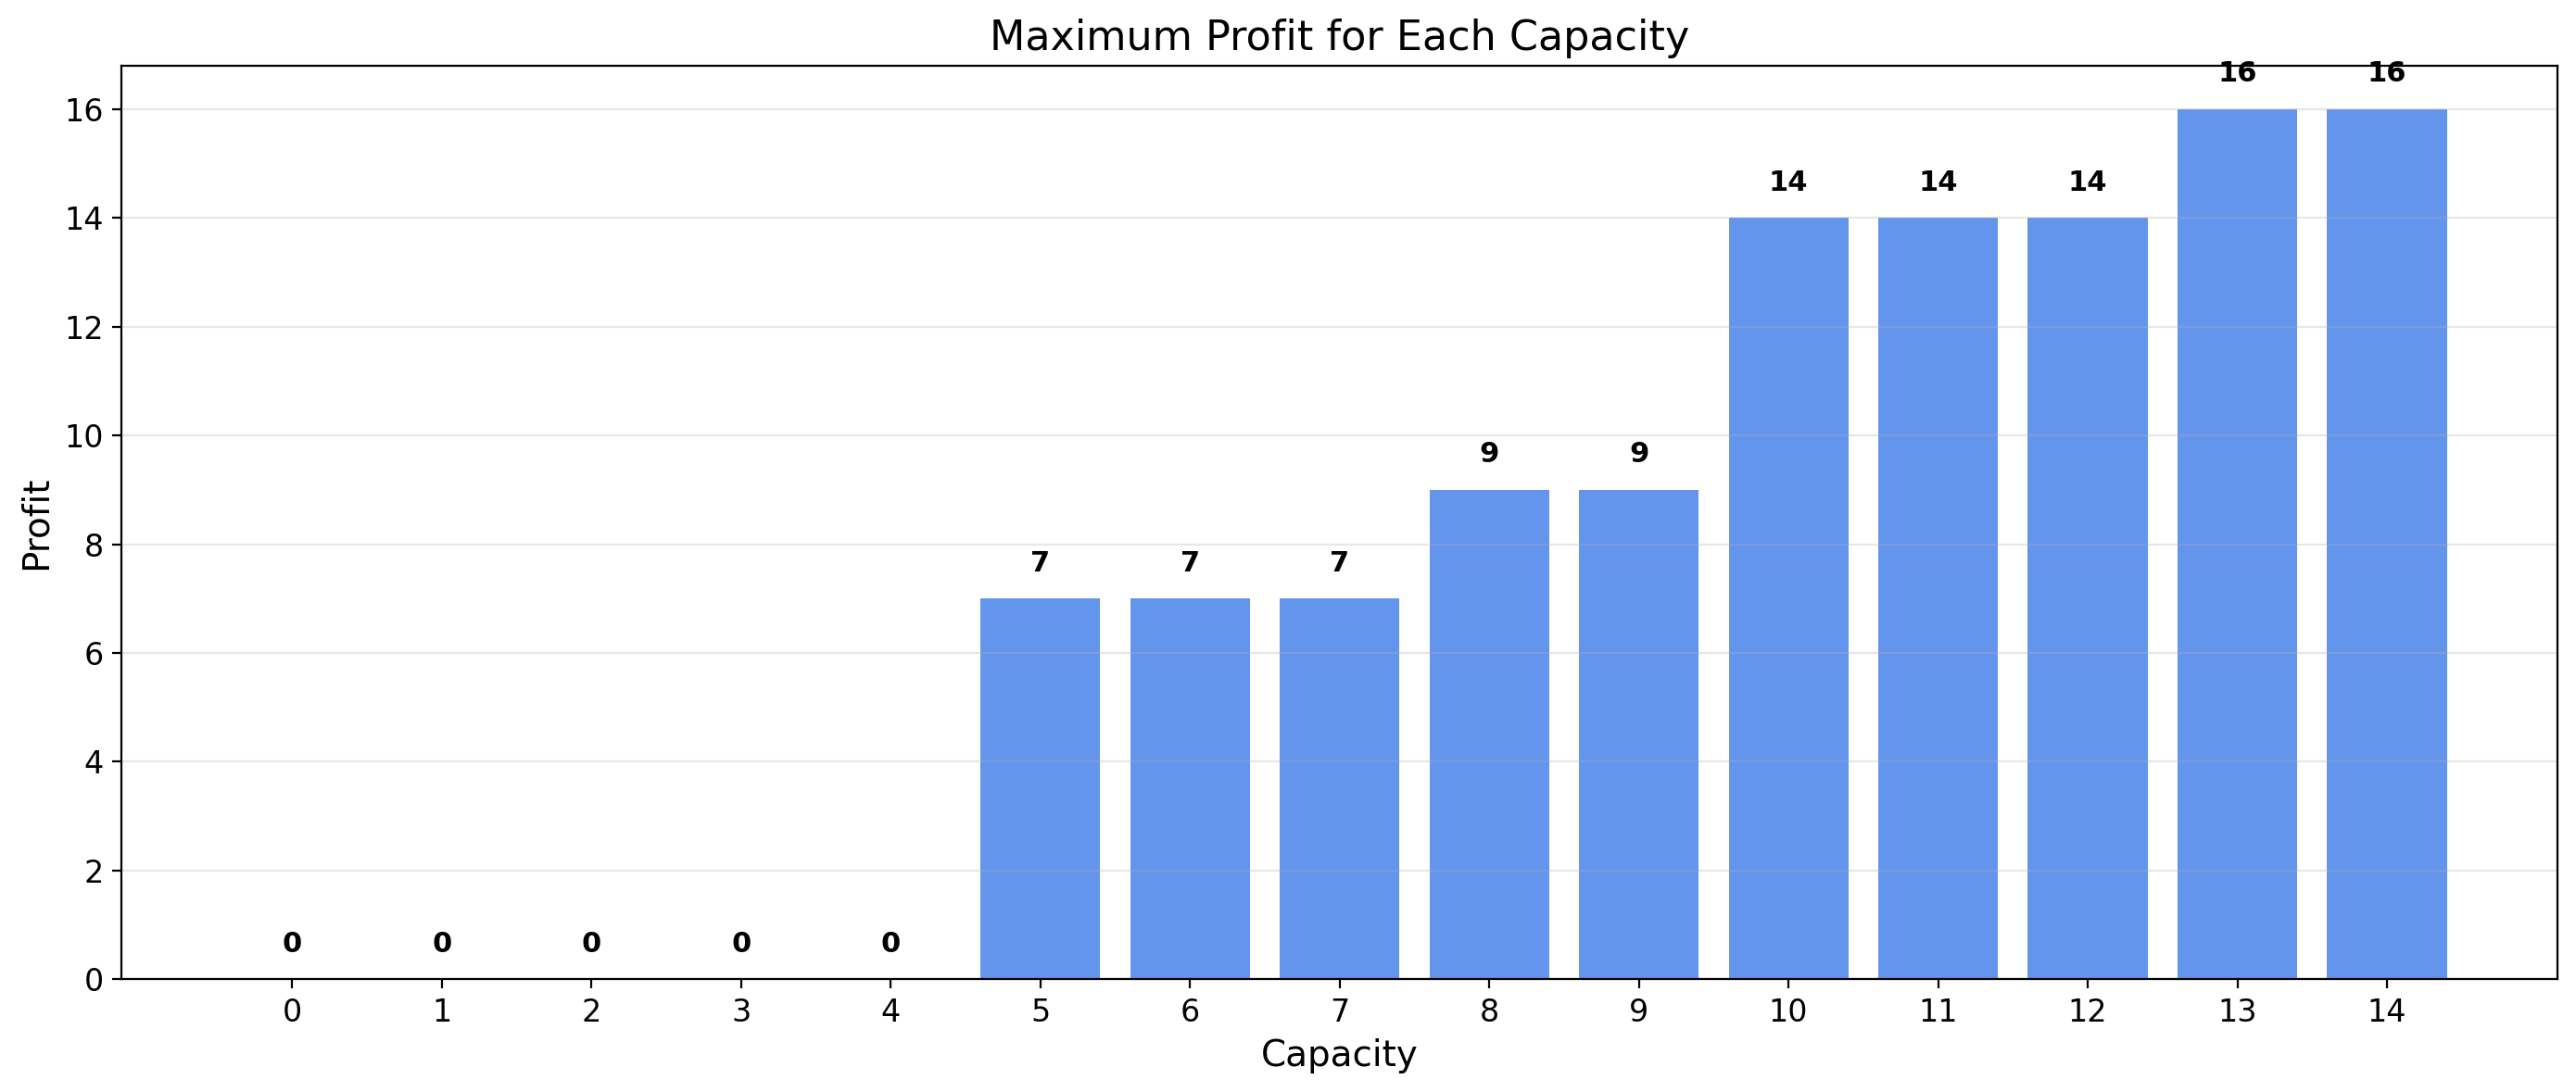

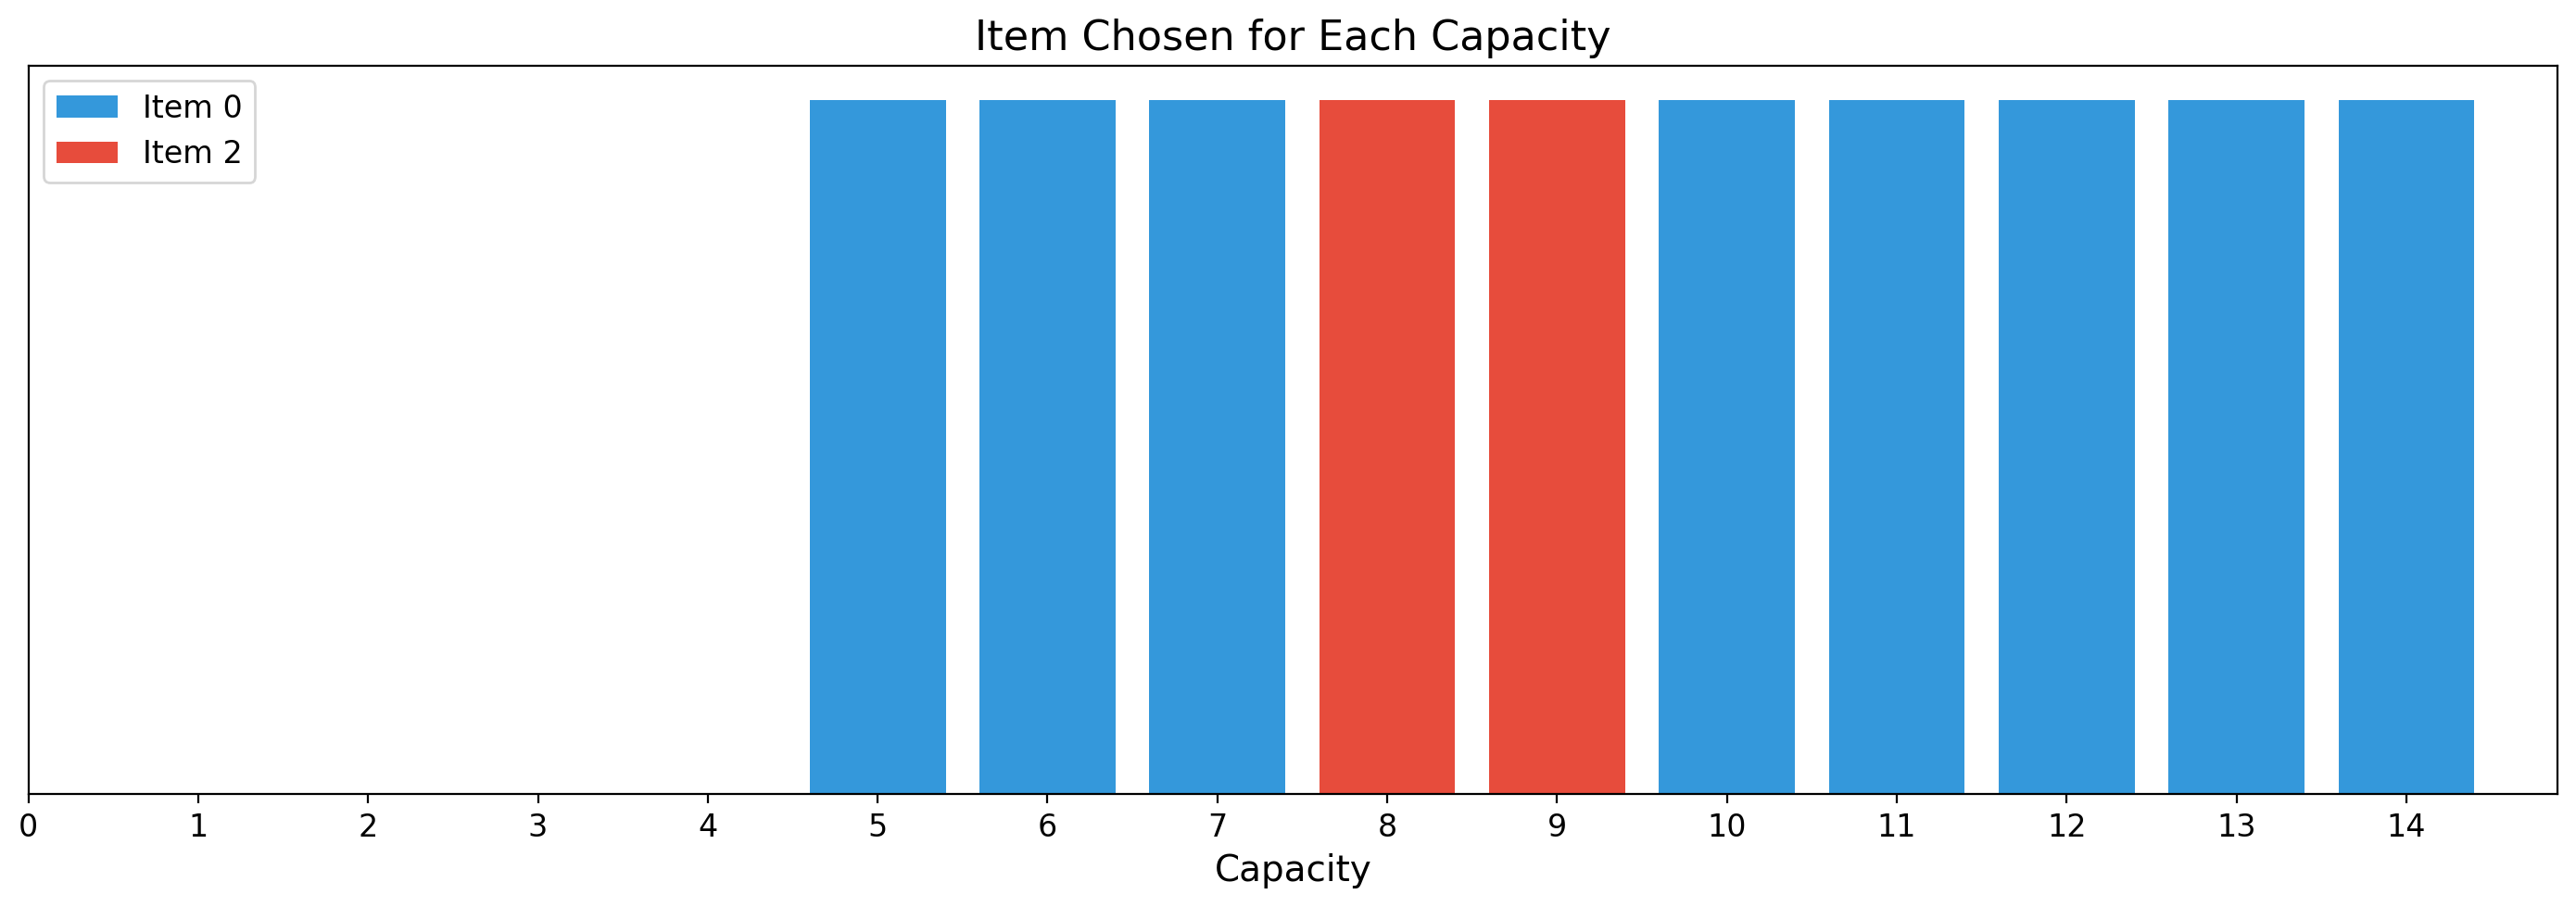

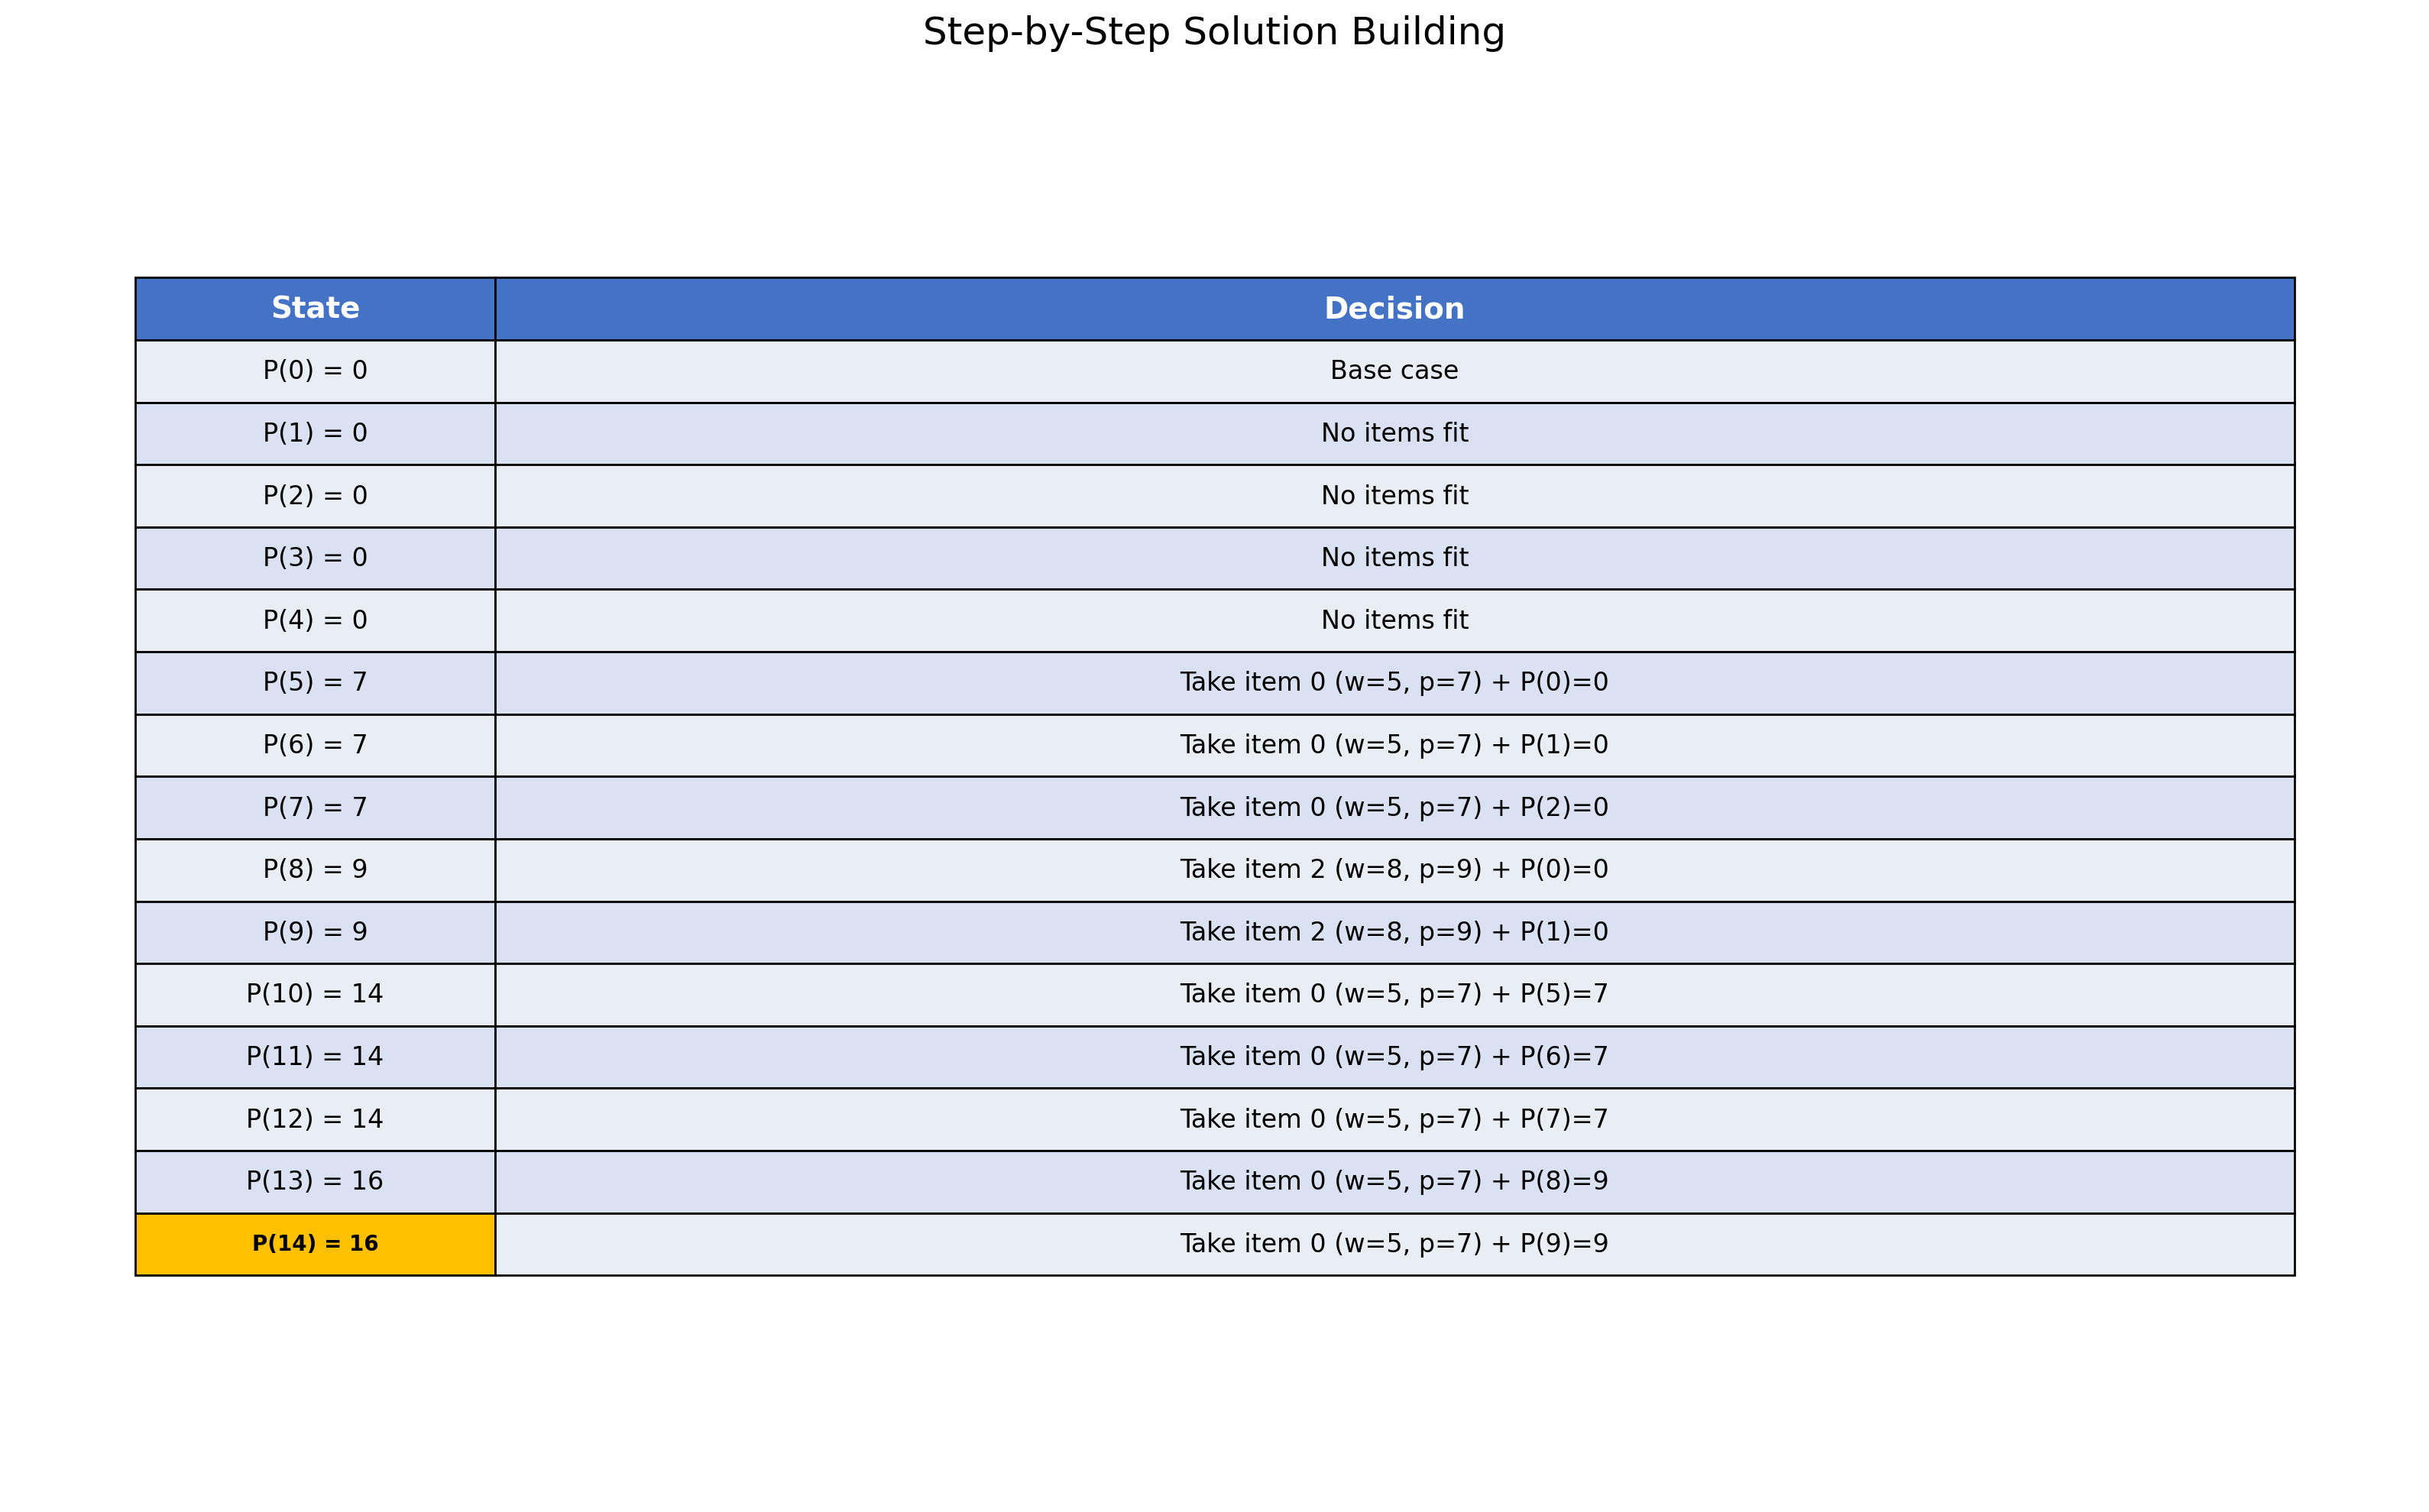


OPTIMAL SOLUTION
Maximum Profit: 16

Items chosen:
  Item 0: 1 units (weight=5, profit=7, total weight=5, total profit=7)
  Item 2: 1 units (weight=8, profit=9, total weight=8, total profit=9)

Total Weight Used: 13 out of 14
Total Profit: 16

Sequence of decisions to reach the optimal solution:
  Step 1: At capacity 14, take item 0 (w=5, p=7), get profit 7, remaining capacity = 9
  Step 2: At capacity 9, take item 2 (w=8, p=9), get profit 9, remaining capacity = 1

DETAILED DECISION PROCESS
For each capacity, we compare taking different items and choose the best option.

Capacity 1:
------------------------------------------------------------
  No valid items can fit.

Capacity 2:
------------------------------------------------------------
  No valid items can fit.

Capacity 3:
------------------------------------------------------------
  No valid items can fit.

Capacity 4:
------------------------------------------------------------
  No valid items can fit.

Capacity 5:
--------

In [9]:
# Test case 2
C2 = 14
w2 = [5, 6, 8]
p2 = [7, 6, 9]
spacious_dp_table_visualization(C2, w2, p2)

## Conclusion

In this project, we've solved the Unbounded Knapsack Problem using dynamic programming. We provided:

1. A recursive definition of the function P(C).
2. A visualization of the subproblem graph for P(14) with the given weights and profits.
3. A dynamic programming algorithm using the bottom-up approach.
4. An implementation in Python with test results for the given examples.

The key insight is that by breaking the problem into smaller subproblems and solving them in a bottom-up manner, we can efficiently find the optimal solution without the exponential time complexity of a naive recursive approach.